# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
X_train = pd.read_csv('D:\Documentos(D)\ProjetosPython\Projeto Credit_Score_Arvore\X_train.csv', delimiter=',')
y_train = pd.read_csv('D:\Documentos(D)\ProjetosPython\Projeto Credit_Score_Arvore\y_train.csv', delimiter=',')
X_test = pd.read_csv('D:\Documentos(D)\ProjetosPython\Projeto Credit_Score_Arvore\X_test.csv', delimiter=',')
y_test = pd.read_csv('D:\Documentos(D)\ProjetosPython\Projeto Credit_Score_Arvore\y_test.csv', delimiter=',')

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\iuryd\AppData\Local\Temp\ipykernel_13644\2609448997.py:1: SyntaxWarning: invalid escape sequence '\D'
  X_train = pd.read_csv('D:\Documentos(D)\ProjetosPython\Projeto Credit_Score_Arvore\X_train.csv', delimiter=',')
C:\Users\iuryd\AppData\Local\Temp\ipykernel_13644\2609448997.py:2: SyntaxWarning: invalid escape sequence '\D'
  y_train = pd.read_csv('D:\Documentos(D)\ProjetosPython\Projeto Credit_Score_Arvore\y_train.csv', delimiter=',')
C:\Users\iuryd\AppData\Local\Temp\ipykernel_13644\2609448997.py:3: SyntaxWarning: invalid escape sequence '\D'
  X_test = pd.read_csv('D:\Documentos(D

In [7]:
print("Distribuição das classes pré balanceamento")
print(y_train.value_counts())

Distribuição das classes pré balanceamento
CreditScore_Encoded
1                      84
0                      30
2                       9
Name: count, dtype: int64


In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribuição das classes após o balanceamento")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento
CreditScore_Encoded
0                      84
1                      84
2                      84
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Primeiramente foi efetuado balanceamento da base de dados para evitar que alguma classe fique sub-representada e evitar enviesamento dos dados ou mal adaptação.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [8]:
arvore_credit_score = DecisionTreeClassifier (criterion ='gini', random_state=0)

arvore_credit_score.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=0)

In [12]:
previsoes_treino = arvore_credit_score.predict(X_train_balanced)
acuracia_treino = accuracy_score(y_train_balanced, previsoes_treino)
print("Acurácia", acuracia_treino)

Acurácia 0.996031746031746


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [13]:
previsoes_teste = arvore_credit_score.predict(X_test)
acuracia_teste = accuracy_score(y_test, previsoes_teste)
print("Acurácia", acuracia_teste)

Acurácia 0.967741935483871


In [14]:
relatorio = classification_report(y_test, previsoes_teste)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.94      0.99      0.96        31
weighted avg       0.97      0.97      0.97        31



Percebemos então que, por mais que o teste teve um resultado menos satisfatório, o modelo se ajustou bem, perdendo pouca efetividade, com uma taxa de acerto de 97%

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

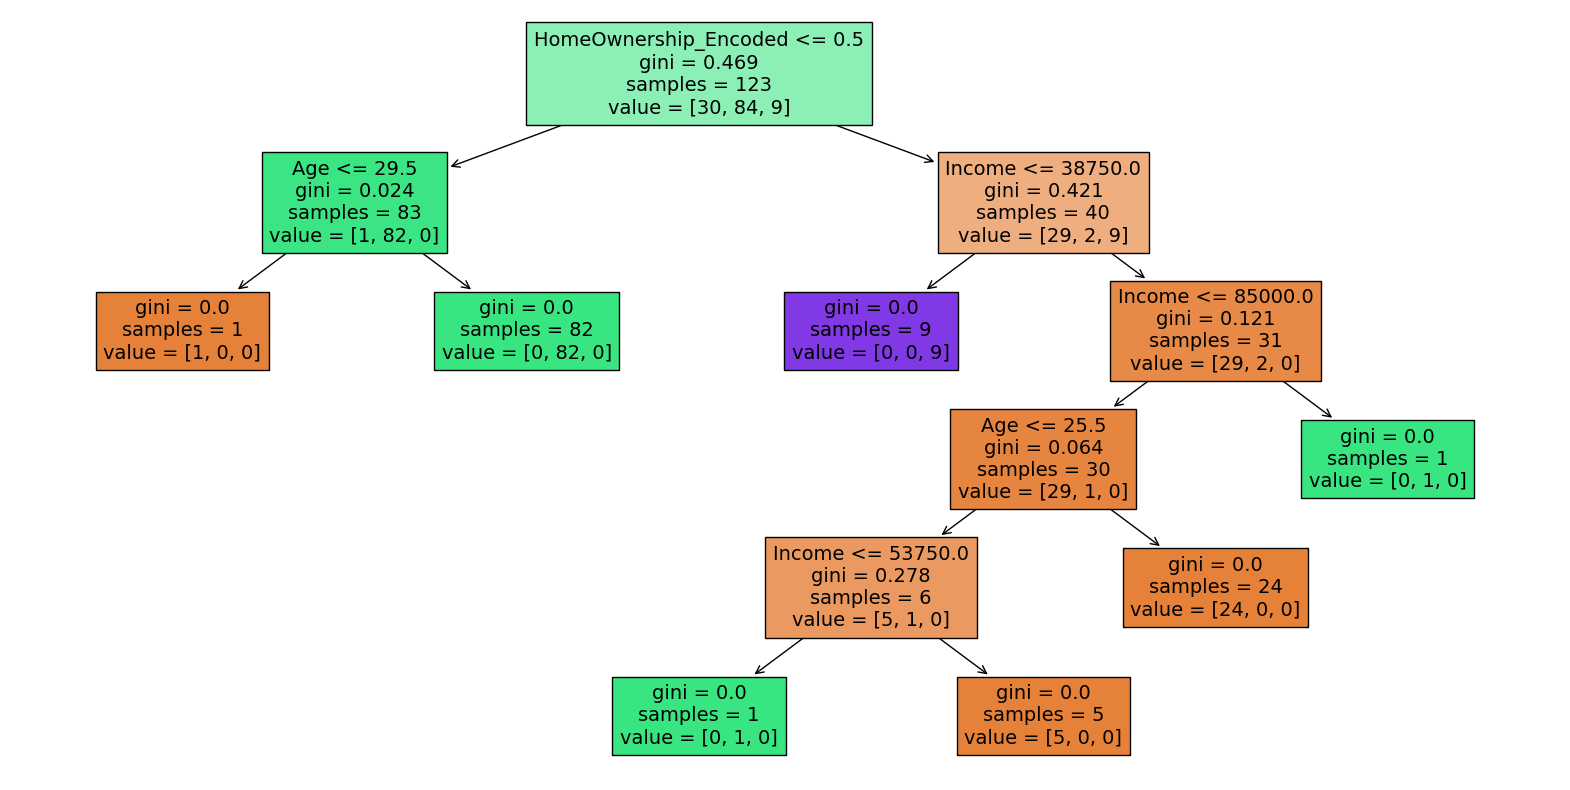

In [16]:
plt.figure(figsize=(20,10))
plot_tree(arvore_credit_score, filled=True, feature_names=X_train_balanced.columns)
plt.show()

Como podemos analisar, a nossa árvore ficou com uma quantidade ideal de folhas, sem ser tão profunda.

# 6) Identifique as 2 principais features do modelo.


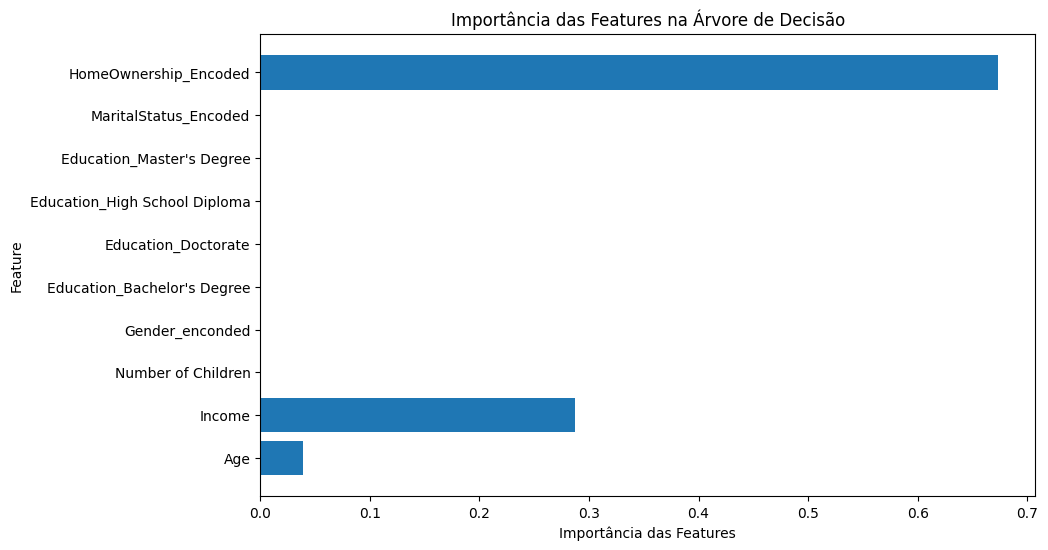

In [17]:
importancia_features = arvore_credit_score.feature_importances_

nomes_features = X_train_balanced.columns

plt.figure(figsize=(10,6))
plt.barh(nomes_features, importancia_features)
plt.xlabel('Importância das Features')
plt.ylabel('Feature')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

Percebemos então que existem poucas colunas importantes para nossa árvore, sendo as duas principais HomeOwnership, Income.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [18]:
X_train_reduzido = X_train_balanced[['HomeOwnership_Encoded', 'Income']]
X_test_reduzido = X_test[['HomeOwnership_Encoded', 'Income']]

In [20]:
arvore_credit_score_reduzido = DecisionTreeClassifier (criterion='gini', random_state=0)
arvore_credit_score_reduzido.fit(X_train_reduzido, y_train_balanced)

DecisionTreeClassifier(random_state=0)

In [21]:
previsoes_reduzido = arvore_credit_score_reduzido.predict(X_test_reduzido)

In [22]:
relatorio_reduzido = classification_report(y_test, previsoes_reduzido)
print('Relatório de Classificação reduzido')
print(relatorio_reduzido)

Relatório de Classificação reduzido
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.92      0.92      0.92        31
weighted avg       0.94      0.94      0.94        31



O resultado das análises não apresentou uma melhora aparente

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Aparentemente o modelo de Naive Bayes se adaptou melhor, obtendo 100% de acertos enquanto a Árvore de decisão obteve 97%, porém, ao acrescentar novas variáveis, o modelo da árvore provavelmente se adaptará melhor, pois identificou quais são as features mais importantes na base de dados.